In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [16]:
import pandas as pd

tsla_data = pd.read_csv('/Users/fatemamahimwala/Documents/TSLA-Quantitative-Research/Data/TSLA_data1.csv')
ndxl_data = pd.read_csv('/Users/fatemamahimwala/Documents/TSLA-Quantitative-Research/Data/NDXL_Normalised_OHLC_VWAP_VOL.csv')
tsla_norm_data = pd.read_csv('/Users/fatemamahimwala/Documents/TSLA-Quantitative-Research/Data/TSLA_Normalised_OHLC_VWAP_VOL.csv')


In [17]:
tsla_norm_data.loc[tsla_norm_data['Close_Price'] == 0, 'Close_Price'] = None
tsla_norm_data['Close_Price'] = tsla_norm_data['Close_Price'].ffill()

tsla_norm_data['Daily_Return'] = tsla_norm_data['Close_Price'].pct_change()

tsla_norm_data['Daily_Return'] = tsla_norm_data['Daily_Return'].replace([np.inf, -np.inf], np.nan)
tsla_norm_data['Daily_Return'] = tsla_norm_data['Daily_Return'].fillna(0)  

drift = tsla_norm_data['Daily_Return'].mean()

volatility = tsla_norm_data['Daily_Return'].std()

print(f"Drift (Average Return): {drift:.6f}")
print(f"Volatility (Standard Deviation): {volatility:.6f}")




Drift (Average Return): 0.005140
Volatility (Standard Deviation): 0.078022


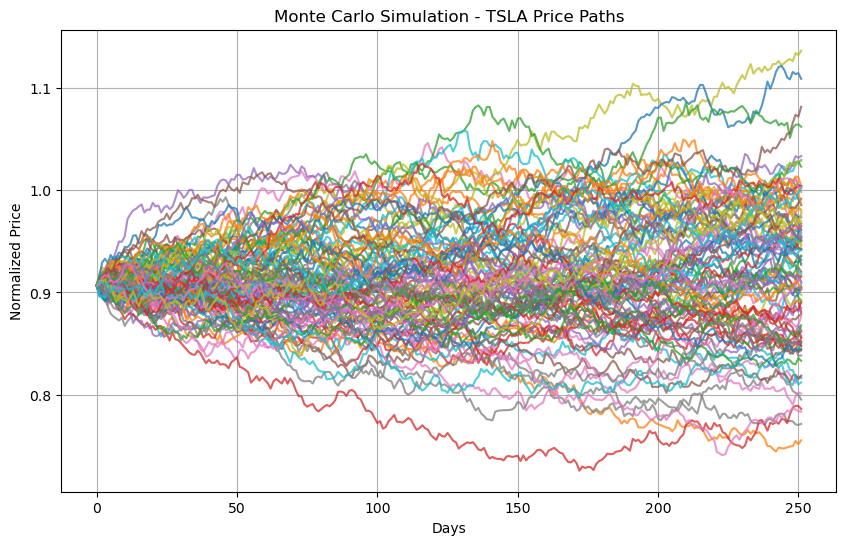

All simulations saved as /Users/fatemamahimwala/Documents/TSLA-Quantitative-Research/Simulation_Images//all_simulations.png


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os

S0 = tsla_norm_data['Close_Price'].iloc[-1]  
T = 252  
N = 10000  
dt = 1 / T  

price_paths = np.zeros((T, N))
price_paths[0] = S0  

for t in range(1, T):
    random_shocks = np.random.normal(0, 1, N)  
    price_paths[t] = price_paths[t - 1] * np.exp(
        (drift - 0.5 * volatility**2) * dt + volatility * random_shocks * np.sqrt(dt)
    )

output_dir = '/Users/fatemamahimwala/Documents/TSLA-Quantitative-Research/Simulation_Images/'
os.makedirs(output_dir, exist_ok=True)  

plt.figure(figsize=(10, 6))
plt.plot(price_paths[:, :100], alpha=0.75)  
plt.title("Monte Carlo Simulation - TSLA Price Paths")
plt.xlabel("Days")
plt.ylabel("Normalized Price")
plt.grid(True)

all_simulations_filename = f'{output_dir}/all_simulations.png'
plt.savefig(all_simulations_filename, dpi=300, bbox_inches='tight')
plt.show()  

print(f"All simulations saved as {all_simulations_filename}")


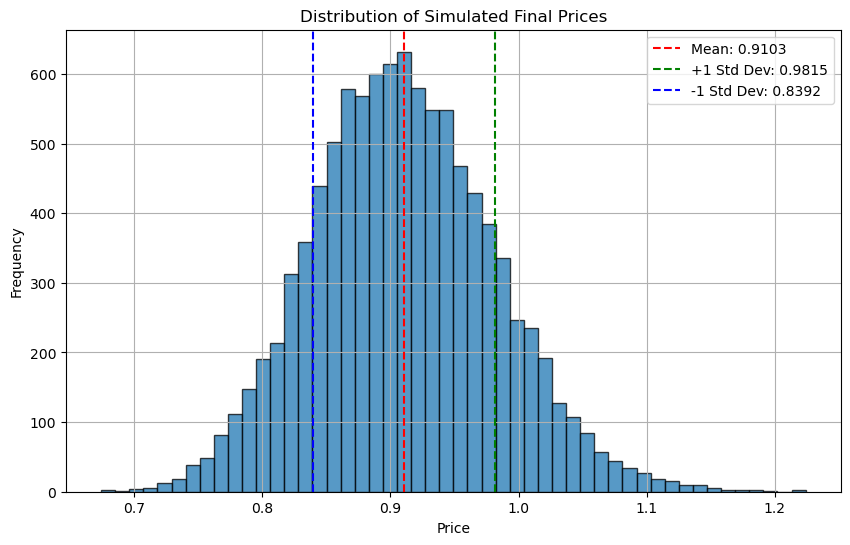

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(final_prices, bins=50, alpha=0.75, edgecolor='black')
plt.title("Distribution of Simulated Final Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.axvline(mean_price, color='red', linestyle='--', label=f"Mean: {mean_price:.4f}")
plt.axvline(price_plus_1_std, color='green', linestyle='--', label=f"+1 Std Dev: {price_plus_1_std:.4f}")
plt.axvline(price_minus_1_std, color='blue', linestyle='--', label=f"-1 Std Dev: {price_minus_1_std:.4f}")
plt.legend()
plt.grid(True)
output_dir = '/Users/fatemamahimwala/Documents/TSLA-Quantitative-Research/'
plt.savefig(f'{output_dir}/distribution_simulated_final_prices.png', dpi=300, bbox_inches='tight')
plt.show()  


In [8]:
tsla_norm_data.loc[tsla_norm_data['Close_Price'] == 0, 'Close_Price'] = None
tsla_norm_data['Close_Price'] = tsla_norm_data['Close_Price'].ffill()

tsla_norm_data['Daily_Return'] = tsla_norm_data['Close_Price'].pct_change()

tsla_norm_data['Daily_Return'] = tsla_norm_data['Daily_Return'].replace([np.inf, -np.inf], np.nan)
tsla_norm_data['Daily_Return'] = tsla_norm_data['Daily_Return'].fillna(0)  

drift = tsla_norm_data['Daily_Return'].mean()

volatility = tsla_norm_data['Daily_Return'].std()

print(f"Drift (Average Return): {drift:.6f}")
print(f"Volatility (Standard Deviation): {volatility:.6f}")


Drift (Average Return): 0.005140
Volatility (Standard Deviation): 0.078022
